# Project Details

## Analysis of the twitter account weratedogs

The twitter account weRatedogs gained popularity since the last years. Showing cute dogs and rate them with funny ratings and texts, did collect a large fan base.

In the following steps we gather data from different sources like twitter api as json format, a basic csv dataset, and a neural network dataset for dog prediction from the web.

All datasets will be gathered as files, merged and bring in a new dataformat like csv and sql.

At the end there should be an cleaned dataframe stored in different files.

As following step the dataset will be analyzed and visualized for 3 major insights. A PDF file for the visualized outcomes with descriptions, is provided in the repository.

Lets start. 


## Content:

- <a href="#Gather">1. Gathering</a>
- <a href="#Asses">2. Asses</a>
- <a href="Cleaning">3.Cleaning</a>
- <a href="#Insights">4.Insights</a>

### <a id='Gather'>1. Gathering<a>

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
from pprint import pprint
import seaborn as sns
from IPython.display import display

# display options for better working with large columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# source : https://blog.softhints.com/pandas-display-all-columns-and-show-more-rows/

## For a full description of the wrangle steps view wrange_report.pdf

The first piece of data get manually downloaded at the udacity website and get stored in the folder of the jupyter notebook

In [2]:
twitter_arch = pd.read_csv('./uda_data/twitter-archive-enhanced-2.csv')
twitter_arch.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

### Download from Web via Request library
Now the image predictions file will get downloaded via Request Library.


In [3]:
###
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('./data/image_predictions.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('./data/image_predictions.tsv', sep='\t')


In [4]:
image_predictions = pd.read_csv('./data/image_predictions.tsv', sep='\t')

### Download from API via Tweepy




In [5]:
CONSUMER_KEY = #
CONSUMER_SECRET =#
OAUTH_TOKEN = #
OAUTH_TOKEN_SECRET=#

In [6]:
auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [132]:
#tweet ID, retweet count, and favorite count are min reqs.
#problem: 144 error no status with id found
#solution:
df_list = []
df_errors = []
for ids in twitter_arch['tweet_id']:
    try:
        x = api.get_status(ids,tweet_mode="extended",wait_on_rate_limit=True)._json
        
    
        df_list.append({
            'id':int(ids),
            'retweets':int(x['retweet_count']),
            'favorite_tweet':int(x['favorite_count']),
            'followers_user':int(x['user']['followers_count']),
            'favourites_user':int(x['user']['favourites_count'])
            
            })
        print(ids)
    except Exception as error:
        df_errors.append({
            'ids':int(ids),
            'error':str(error)
        })
        print(error)


892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270

825120256414846976
825026590719483904
824796380199809024
824775126675836928
824663926340194305
824325613288833024
824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107

770772759874076672
[{'code': 144, 'message': 'No status found with that ID.'}]
770655142660169732
770414278348247044
770293558247038976
770093767776997377
770069151037685760
769940425801170949
769695466921623552
769335591808995329
769212283578875904
768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711

711998809858043904
711968124745228288
711743778164514816
711732680602345472
711694788429553666
711652651650457602
711363825979756544
711306686208872448
711008018775851008
710997087345876993
710844581445812225
710833117892898816
710658690886586372
710609963652087808
710588934686908417
710296729921429505
710283270106132480
710272297844797440
710269109699739648
710153181850935296
710140971284037632
710117014656950272
709918798883774466
709901256215666688
709852847387627521
709566166965075968
709556954897764353
709519240576036864
709449600415961088
709409458133323776
709225125749587968
709207347839836162
709198395643068416
709179584944730112
709158332880297985
709042156699303936
708853462201716736
708845821941387268
708834316713893888
708810915978854401
708738143638450176
708711088997666817
708479650088034305
708469915515297792
708400866336894977
708356463048204288
708349470027751425
708149363256774660
708130923141795840
708119489313951744
708109389455101952
708026248782585858
707995814724

682259524040966145
682242692827447297
682088079302213632
682059653698686977
682047327939461121
682032003584274432
682003177596559360
681981167097122816
681891461017812993
681694085539872773
681679526984871937
681654059175129088
681610798867845120
681579835668455424
681523177663676416
681340665377193984
681339448655802368
681320187870711809
681302363064414209
681297372102656000
681281657291280384
681261549936340994
681242418453299201
681231109724700672
681193455364796417
680970795137544192
680959110691590145
680940246314430465
680934982542561280
680913438424612864
680889648562991104
680836378243002368
680805554198020098
680801747103793152
680798457301471234
680609293079592961
680583894916304897
680497766108381184
680494726643068929
680473011644985345
680440374763077632
680221482581123072
680206703334408192
680191257256136705
680176173301628928
680161097740095489
680145970311643136
680130881361686529
680115823365742593
680100725817409536
680085611152338944
680070545539371008
[{'code': 14

670668383499735048
670474236058800128
670468609693655041
670465786746662913
670452855871037440
670449342516494336
670444955656130560
670442337873600512
670435821946826752
670434127938719744
670433248821026816
670428280563085312
670427002554466305
670421925039075328
670420569653809152
670417414769758208
670411370698022913
670408998013820928
670403879788544000
670385711116361728
670374371102445568
670361874861563904
670338931251150849
670319130621435904
670303360680108032
670290420111441920
670093938074779648
670086499208155136
670079681849372674
670073503555706880
670069087419133954
670061506722140161
670055038660800512
670046952931721218
670040295598354432
670037189829525505
670003130994700288
669993076832759809
669972011175813120
669970042633789440
669942763794931712
669926384437997569
669923323644657664
669753178989142016
669749430875258880
669684865554620416
669683899023405056
669682095984410625
669680153564442624
669661792646373376
669625907762618368
669603084620980224
669597912108

In [135]:
#check if df_list got build right
print("entrys",len(df_list)),df_list[1]

entrys 2331


(None,
 {'id': 892177421306343426,
  'retweets': 5547,
  'favorite_tweet': 30632,
  'followers_user': 8898085,
  'favourites_user': 145993})

In [136]:
#check error messages
#checking which error messages appears, for quick debugging
df_twpy_fail = pd.DataFrame(df_errors)
df_twpy_fail['error'].value_counts()

[{'code': 144, 'message': 'No status found with that ID.'}]                        24
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]     1
Name: error, dtype: int64

### Data into Json and reading dataframe

In [137]:
#saving tweet data in tweet_json.txt file
json_data = pd.DataFrame(df_list)
json_tweets= json_data.to_csv("./data/tweet_json.txt",encoding ='utf-8',index=False)


In [138]:
# read tweet_json.txt into dataframe
df_json= pd.read_csv("./data/tweet_json.txt")
df_json.tail()


id  retweets  favorite_tweet  followers_user  \
2326  666049248165822465        39              96         8898096   
2327  666044226329800704       124             265         8898097   
2328  666033412701032449        39             109         8898097   
2329  666029285002620928        41             119         8898097   
2330  666020888022790149       448            2355         8898097   

      favourites_user  
2326           145992  
2327           145992  
2328           145992  
2329           145992  
2330           145992

### <div id='Asses'>2. Asses</div>
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [139]:
df_json.head()

id  retweets  favorite_tweet  followers_user  \
0  892420643555336193      7473           35391         8898085   
1  892177421306343426      5547           30632         8898085   
2  891815181378084864      3671           23039         8898085   
3  891689557279858688      7647           38677         8898085   
4  891327558926688256      8248           36959         8898085   

   favourites_user  
0           145993  
1           145993  
2           145993  
3           145993  
4           145993

In [140]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2331 non-null   int64
 1   retweets         2331 non-null   int64
 2   favorite_tweet   2331 non-null   int64
 3   followers_user   2331 non-null   int64
 4   favourites_user  2331 non-null   int64
dtypes: int64(5)
memory usage: 91.2 KB


In [141]:
df_json.describe()

id      retweets  favorite_tweet  followers_user  \
count  2.331000e+03   2331.000000     2331.000000    2.331000e+03   
mean   7.419079e+17   2625.976405     7393.879451    8.898085e+06   
std    6.823170e+16   4442.588549    11484.399781    7.695841e+01   
min    6.660209e+17      1.000000        0.000000    8.898057e+06   
25%    6.782670e+17    533.500000     1285.500000    8.898063e+06   
50%    7.182469e+17   1226.000000     3209.000000    8.898078e+06   
75%    7.986692e+17   3047.000000     9045.500000    8.898090e+06   
max    8.924206e+17  75473.000000   152490.000000    8.898745e+06   

       favourites_user  
count      2331.000000  
mean     145992.394251  
std           0.506898  
min      145992.000000  
25%      145992.000000  
50%      145992.000000  
75%      145993.000000  
max      145994.000000

In [142]:
# check if all ids are unique
df_json['id'].nunique()

2331

In [143]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [144]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [145]:
image_predictions.tail(5)

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                  p1   p1_conf  p1_dog                  p2  \
2070        2              basset  0.555712    True    English_springer   
2071        1  Labrador_retriever  0.170278   False  Labrador_retriever   
2072        1           Chihuahua  0.716012    True            malamute   
2073        1           Chihuahua  0.323581    True            Pekinese   
2074        1                 NaN  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False

In [146]:
# usual tidiness check as function
def checkdf(df):
    print("shape:",df.shape)
    display(df.head(3))
    display(df.describe())
    display(df.info())
    
    
    print("number of unique values:")
    display(df.nunique())


In [147]:
checkdf(twitter_arch)



shape: (2356, 17)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   

   rating_numerator  rating_denominator     name doggo floofer pupper puppo  
0                13                  10  Phineas  None    None   None  None  
1                13                  10    Tilly  None    None   None  None  
2                12                  10   Archie  None    None   None  None

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

number of unique values:


tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [148]:
# looking for fantasy dog names wich are nnot real
arch_names = twitter_arch['name']
names =arch_names[arch_names.apply(len) < 4].value_counts()

names.head(51)

a      55
Bo      9
the     8
an      7
Jax     6
Leo     6
Gus     5
one     4
Ted     3
Mia     3
Max     3
not     2
mad     2
Doc     2
Ash     2
Moe     2
Sam     2
Ava     2
Lou     2
Eve     2
Tyr     2
Bob     2
Ken     2
Eli     2
Jim     1
Al      1
Mya     1
Ed      1
Sid     1
Amy     1
Dex     1
Tom     1
my      1
Ike     1
O       1
Aja     1
Evy     1
Ron     1
Jay     1
Jed     1
his     1
Ben     1
Cal     1
Ace     1
Obi     1
Ito     1
Dot     1
Jo      1
Mac     1
by      1
all     1
Name: name, dtype: int64

In [149]:
#watch nominator and denominator for unusual ratings
twitter_arch['rating_denominator'].value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [150]:
# looking up, if some rating numerators are below 10, because usually its over the 10 denominator
twitter_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [151]:
twitter_arch['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [152]:
# watching sources
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [153]:
# checking duplicated id´s
(twitter_arch.tweet_id.duplicated()).value_counts()

False    2356
Name: tweet_id, dtype: int64

In [154]:
# quality tidiness check for predictions from udacity download files, neural network results
checkdf(image_predictions)

shape: (2075, 12)


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

number of unique values:


tweet_id    2075
jpg_url     2009
img_num        4
p1           114
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [155]:
image_predictions.jpg_url

0                                               https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1                                               https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2                                               https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3                                               https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4                                               https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
5                                               https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
6                                               https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
7                                               https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
8                                               https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
9                                               https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg
10                                      

In [156]:
json_data1 = pd.read_csv('./data/tweet_json.txt')
# quality tidiness check for api json dataframe, from tweepy
checkdf(json_data1)

shape: (2331, 5)


id  retweets  favorite_tweet  followers_user  \
0  892420643555336193      7473           35391         8898085   
1  892177421306343426      5547           30632         8898085   
2  891815181378084864      3671           23039         8898085   

   favourites_user  
0           145993  
1           145993  
2           145993

id      retweets  favorite_tweet  followers_user  \
count  2.331000e+03   2331.000000     2331.000000    2.331000e+03   
mean   7.419079e+17   2625.976405     7393.879451    8.898085e+06   
std    6.823170e+16   4442.588549    11484.399781    7.695841e+01   
min    6.660209e+17      1.000000        0.000000    8.898057e+06   
25%    6.782670e+17    533.500000     1285.500000    8.898063e+06   
50%    7.182469e+17   1226.000000     3209.000000    8.898078e+06   
75%    7.986692e+17   3047.000000     9045.500000    8.898090e+06   
max    8.924206e+17  75473.000000   152490.000000    8.898745e+06   

       favourites_user  
count      2331.000000  
mean     145992.394251  
std           0.506898  
min      145992.000000  
25%      145992.000000  
50%      145992.000000  
75%      145993.000000  
max      145994.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2331 non-null   int64
 1   retweets         2331 non-null   int64
 2   favorite_tweet   2331 non-null   int64
 3   followers_user   2331 non-null   int64
 4   favourites_user  2331 non-null   int64
dtypes: int64(5)
memory usage: 91.2 KB


None

number of unique values:


id                 2331
retweets           1681
favorite_tweet     1976
followers_user       53
favourites_user       3
dtype: int64

## <p id="Cleaning">3. Cleaning</p> 

By asses the data visually and programmatic, there are 8 quality issues and 2 tidiness issues which will processed in the next cleaning step: 

### Quality Issues



#### 1. NaN
First checking up Status/User Ids who replied to a post etc. For this we search all Rows who have not NaN, and then filter them out of the twitter_arch DataFrame.	

#### 2.Merging
By joining the json-dataframe with twitter archive and with pd.merge only thing to make sure is the join method is left, to avoid  doubled columns and

#### 3. Time data-type 
Chaning the column timestamp with pd.to_datetime.

#### 4. Doubled url´s
first we search, by regex, every string with an „ , „ in it. Fast we can see that there are very much doubled urls and also tripled urls. Also urls from not twitter posts e.g vine, are in the column.
By setting up a regex grouping pattern, the expanded_urls column 	will get filtered. By testing this string i ended up filtering all mulitple links to just one link. A big problem was to correcty set up regex and extracting then only one url.
This url get stored in a new column and the old one „expaned_urls“ will get droped out of the dataframe.

By dropping out the dataframe expanded urls column we only have urls column left.

#### 5. Dog names
looking up some names like „an“ in the dropped df, displaye wiht text. It turns out for example „an“ or „a“ name is filtered from the tweet because there were no name in the tweet. For example „This is an East African“.
Setting up the column with unusual names and making them to „noname“.
Finding out all unusual names , visually by filtering all names with lenght of 3 letters. Knowing there are also „None“ values.
Using replace(), to filter out the visually assesed values under 3.


#### 6. Source names
defining a dict with plain source text and with value pair of short souce name e.g „iphone“. Then maping the dict to the source column and store it in a new df.

For quality point 7
first looking up some issues with the numerator we look visually on different expanded urls where numerator is over 15. Then find an example why numerator is wrong. It turns out that decimals text, got wrongly filgered into the original DF.
Now we look up, with an regular expression, which text columns, have „./“ in it with letters before and after the „/“.


We print out the related rating numerator and 	check which decimals were original in the tweet.

For the denominator we use the same method. First acces visually all rows who have NOT 10 as denominator.

By checking each of the re	sults we can identify that there are some fun ratings like „“ and some gathering issues, where just numbers like „9/11“ got captured and filled in the rating columns.
With regular expression we filtering all text ratings with decimals and replace the numerator column with floats. By setting up changenum function we can manually change easy by id, wrong number and new number. Selfmade functions are gret :)


Checking it again adn some ratings arent affected by that. This ratings are fun ratings like 1776 for america day e.g. For every non sense rating we give „10“ and every rating that makes a little sense, like rating for more dogs „44/40, for 4 dogs e.g, to brake down to a real rating we replace in the column.
By using the changenum Function we make everything fine. There are to many values to make it manually like in the first place. So we write a for loop with counting list which counts to 13 to count all 14 rating numeartors over 14.
This counter controlls the slicing value for tweet_ids,rating_numerator and corrected_rating numerator.

There are alslo rating_numerator values below 10, by pd.query them, it looks like some dogs are bad dogs so they get this rating not by accident :(


#### 8. Dog breeds and stages

Having dog stages in 4 different columns, for later analysis we melt them into 1 column.
After melting the var column have to get dropped.
The final results get stored a new dataframe. By melting the columns rows get duplicated so tweet id arent unique anymore. Fixin that with drop_duplicates will give clean rows again.

For getting dog types we join the image_predictions.csv by only getting column p1_name when p1(Dog) is TRUE.
Renaming the colum p1 to make sure nothing i sto complicated

By the end we dropping not needed columsn like retweeted columns.


### Tidiness issues

#### 1. Renaming column
renaming p1 to dog_type needs to be done with assigning the dogtype column to p1 in order to that p1 needs to get dropped on axis 1.	

#### 2. Uppercase to lowercase

 Dealing with series problem by calling dot lower to the column. By writing „str.lower()“ we avoid that problem and every value get filled in as lowercase.



In [157]:
img_pred = image_predictions

In [158]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [159]:
twitter_arch['in_reply_to_status_id'].shape

(2356,)

In [160]:
json_data1.followers_user

0       8898085
1       8898085
2       8898085
3       8898085
4       8898085
5       8898085
6       8898085
7       8898085
8       8898085
9       8898085
10      8898085
11      8898085
12      8898085
13      8898086
14      8898086
15      8898086
16      8898086
17      8898087
18      8898087
19      8898087
20      8898087
21      8898087
22      8898087
23      8898087
24      8898087
25      8898087
26      8898087
27      8898087
28      8898087
29      8898087
30      8898087
31      8898087
32      8898087
33      8898087
34      8898087
35      8898087
36      8898087
37      8898088
38      8898088
39      8898088
40      8898088
41      8898088
42      8898088
43      8898088
44      8898088
45      8898089
46      8898089
47      8898089
48      8898089
49      8898089
50      8898089
51      8898089
52      8898089
53      8898089
54      8898089
55      8898089
56      8898089
57      8898089
58      8898089
59      8898089
60      8898089
61      8898089
62      

#### point 1
We only want original posts so we sort out all replied tweets.

In [161]:

arch_drop = twitter_arch.drop(twitter_arch[twitter_arch['in_reply_to_status_id'].isnull() == False].index)

arch_drop['in_reply_to_user_id'].shape


(2278,)

In [162]:
# deleting retweeted id tweets
arch_drop = arch_drop.drop(arch_drop[arch_drop['retweeted_status_id'].isnull()==False].index)
arch_drop['retweeted_status_id'].shape
#arch_drop is now the df with no replied tweets and only original tweets

(2097,)

In [163]:
arch_drop.info(),arch_drop.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

(None,
              tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
 0  892420643555336193                    NaN                  NaN   
 
                    timestamp  \
 0  2017-08-01 16:23:56 +0000   
 
                                                                                source  \
 0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
 
                                                                                                             text  \
 0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
 
    retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
 0                  NaN                       NaN                        NaN   
 
                                                      expanded_urls  \
 0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
 
    rating_numerator  rating_denominator     name doggo flo

#### Point 2
join json data in twitter arch df.

In [164]:
json_data1 = json_data1.rename(columns={'id':'tweet_id'})


In [165]:
arch_drop = pd.merge(arch_drop,json_data1,on="tweet_id",how='left')


#### Point 3
Fixing Datetime.

In [166]:
# according quality point 3
# fix datetime
arch_drop['timestamp'] = pd.to_datetime(arch_drop['timestamp'])
arch_drop.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                  timestamp  \
0 2017-08-01 16:23:56+00:00   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                            text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   

   rating_numerator  rating_denominator     name doggo floofer pupper puppo  \
0                13                  10  Phineas  None    None   None  None   

   retweets  favorite_tweet  followers_user  favourites_user  
0    7473.0         35391.0       8898085.0         145993.0

In [167]:
# according quality point 3
# fix datetime
arch_drop['retweeted_status_timestamp'] = pd.to_datetime(arch_drop['retweeted_status_timestamp'])
arch_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [168]:

arch_drop_new1 = arch_drop
arch_drop_new1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                  timestamp  \
0 2017-08-01 16:23:56+00:00   
1 2017-08-01 00:17:27+00:00   
2 2017-07-31 00:18:03+00:00   
3 2017-07-30 15:58:51+00:00   
4 2017-07-29 16:00:24+00:00   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaT   
1                  NaN                       NaN                        NaT   
2                  NaN                       NaN                        NaT   
3                  NaN                       NaN                        NaT   
4                  NaN                       NaN                        NaT   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  \
0                13                  10   Phineas  None    None   None  None   
1                13                  10     Tilly  None    None   None  None   
2                12                  10    Archie  None    None   None  None   
3                13                  10     Darla  None    None   None  None   
4                12                  10  Franklin  None    None   None  None   

   retweets  favorite_tweet  followers_user  favourites_user  
0    7473.0         35391.0       889

#### Point 4 removing mulitple URLS

Source column is to much information. We brake it down to 1 clear source name.

In [169]:
#according quality point 4
# clean the source column by apply smile to read text to different sources
sourcemap ={'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':"vine",
             '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'iphone',
             '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'twitter_web',
             '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'twitter_deck'
            }
arch_drop_new1['source'] = arch_drop_new1['source'].map(sourcemap)

In [170]:
#check if all sources got changed right
arch_drop_new1.source.value_counts()

iphone          1964
vine              91
twitter_web       31
twitter_deck      11
Name: source, dtype: int64

In [171]:
df_test1 = arch_drop_new1
df_test1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                  timestamp  source  \
0 2017-08-01 16:23:56+00:00  iphone   
1 2017-08-01 00:17:27+00:00  iphone   
2 2017-07-31 00:18:03+00:00  iphone   
3 2017-07-30 15:58:51+00:00  iphone   
4 2017-07-29 16:00:24+00:00  iphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaT   
1                  NaN                       NaN                        NaT   
2                  NaN                       NaN                        NaT   
3                  NaN                       NaN                        NaT   
4                  NaN                       NaN                        NaT   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  \
0                13                  10   Phineas  None    None   None  None   
1                13                  10     Tilly  None    None   None  None   
2                12                  10    Archie  None    None   None  None   
3                13                  10     Darla  None    None   None  None   
4                12                  10  Franklin  None    None   None  None   

   retweets  favorite_tweet  followers_user  favourites_user  
0    7473.0         35391.0       8898085.0         145993.0  
1    5547.0         30632.0       8898085.0         145993.0  
2    3671.0         23039.0       8898085.0         145993.0  
3    7647.0         38677.0       8898085.0         145993.0  
4    8248.0         36959.0       8898085.0         145993.0

##### Point 5, unusual names

Checking why there are some unusual names.

In [172]:

# filtering dog names which make no sense e.g to short names

an =arch_drop.query("name =='an'")['text']
an


811      This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt
1139                  This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
1948    This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg
2074    This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL
2076       This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
2090     This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
Name: text, dtype: object

In [173]:
# looking up witch small names to conver to "noname"
names.index

Index(['a', 'Bo', 'the', 'an', 'Jax', 'Leo', 'Gus', 'one', 'Ted', 'Mia', 'Max',
       'not', 'mad', 'Doc', 'Ash', 'Moe', 'Sam', 'Ava', 'Lou', 'Eve', 'Tyr',
       'Bob', 'Ken', 'Eli', 'Jim', 'Al', 'Mya', 'Ed', 'Sid', 'Amy', 'Dex',
       'Tom', 'my', 'Ike', 'O', 'Aja', 'Evy', 'Ron', 'Jay', 'Jed', 'his',
       'Ben', 'Cal', 'Ace', 'Obi', 'Ito', 'Dot', 'Jo', 'Mac', 'by', 'all',
       'Mo', 'Tug', 'old', 'Stu', 'Blu', 'Alf', 'Zoe', 'Sky', 'Dug', 'JD',
       'Pip', 'Jeb', 'Ole', 'Taz', 'Rey', 'Edd', 'Gin'],
      dtype='object')

In [174]:
# replace unusual name values wiht "noname"
arch_drop['name'] = arch_drop.name.replace(["a","an","the","one","not","his","all","by","old","my","O","none","None"],'noname')
arch_drop_new1 = arch_drop

In [175]:
arch_drop_new1.name.value_counts().head(20)

noname     684
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Toby         7
Daisy        7
Bo           6
Bailey       6
Bella        6
Oscar        6
Stanley      6
Jax          6
Koda         6
Scout        5
Name: name, dtype: int64

In [176]:
# sneak controll if everything is right
arch_drop_new1.query("name =='noname'")['text'].head(2)

5    Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7                        When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Name: text, dtype: object

In [177]:
arch_drop_new1.source

0             iphone
1             iphone
2             iphone
3             iphone
4             iphone
5             iphone
6             iphone
7             iphone
8             iphone
9             iphone
10            iphone
11            iphone
12            iphone
13            iphone
14            iphone
15            iphone
16            iphone
17            iphone
18            iphone
19            iphone
20            iphone
21            iphone
22            iphone
23            iphone
24            iphone
25            iphone
26            iphone
27            iphone
28            iphone
29            iphone
30            iphone
31            iphone
32            iphone
33            iphone
34            iphone
35            iphone
36            iphone
37            iphone
38            iphone
39            iphone
40            iphone
41            iphone
42            iphone
43            iphone
44            iphone
45            iphone
46            iphone
47           

#### Point 6 mulitple urls
Some columns have mulitple expanded_urls. Twitter urls are doubled or trippled, via regex we search those patterns and extract only a single url and storing them in the dataframe.

In [178]:
arch_drop_new1.expanded_urls.apply(lambda x: str(x).split(",")[0])


0                                                                                                                                https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                                                                                https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                                                                                https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                                                                                https://twitter.com/dog_rates/status/891689557279858688/photo/1
4                                                                                                                                https://twitter.com/dog_rates/status/891327558926688256/photo/1
5                                  

In [179]:
#df_test1[df_test1.expanded_urls.str.find(r",")].expanded_urls
#df_test1[df_test1.expanded_urls] = df

#df_test1.expanded_urls

In [180]:
twitter_arch.expanded_urls

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                       https://twitter.com/dog_

In [181]:
urlstr = str("https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1")

In [182]:
pattern = r'(https?://twitter\.com/\S*?)(?:,\s*http|$)'
pattern1 = r'(https?://twitter\.com/\S*?)(?:,)'

newdf = pd.DataFrame()
newdf['urls'] = arch_drop_new1.expanded_urls
arch_drop_new1['urls'] = arch_drop_new1.expanded_urls.str.extract(pattern,expand=False)
arch_drop_new1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                  timestamp  source  \
0 2017-08-01 16:23:56+00:00  iphone   
1 2017-08-01 00:17:27+00:00  iphone   
2 2017-07-31 00:18:03+00:00  iphone   
3 2017-07-30 15:58:51+00:00  iphone   
4 2017-07-29 16:00:24+00:00  iphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaT   
1                  NaN                       NaN                        NaT   
2                  NaN                       NaN                        NaT   
3                  NaN                       NaN                        NaT   
4                  NaN                       NaN                        NaT   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  \
0                13                  10   Phineas  None    None   None  None   
1                13                  10     Tilly  None    None   None  None   
2                12                  10    Archie  None    None   None  None   
3                13                  10     Darla  None    None   None  None   
4                12                  10  Franklin  None    None   None  None   

   retweets  favorite_tweet  followers_user  favourites_user  \
0    7473.0         35391.0       8898085.0         145993.0   
1    5547.0         30632.0       8898085.0         145993.0   
2    3671.0         23039.0       8898085.0         145993.0   
3    7647.0         38677.0       8898085.0         145993.0   
4    8248.0         36959.0       8898085.0         145993.0   

                                                              urls  
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  
1  https://twitter.com/dog_rates/status/892177421306343426/photo

In [183]:
arch_drop_new1.urls.value_counts

<bound method IndexOpsMixin.value_counts of 0       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1
5       https://twitter.com/dog_rates/status/891087950875897856/photo/1
6       https://twitter.com/dog_rates/status/890971913173991426/photo/1
7       https://twitter.com/dog_rates/status/890729181411237888/photo/1
8       https://twitter.com/dog_rates/status/890609185150312448/photo/1
9       https://twitter.com/dog_rates/status/890240255349198849/photo/1
10      https://twitter.com/dog_rates/status/890006608113172480/photo/1
11      https://twitter.com/dog_rates/status/889880896479866881/photo/1
12      https://twitter.com/dog_rates/status/889665388333682689/photo/1
13      https://twit

In [184]:
arch_drop_new1 = arch_drop_new1.drop(columns=['expanded_urls'])

In [185]:
arch_drop_new1.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                  timestamp  source  \
0 2017-08-01 16:23:56+00:00  iphone   

                                                                                                            text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaT   

   rating_numerator  rating_denominator     name doggo floofer pupper puppo  \
0                13                  10  Phineas  None    None   None  None   

   retweets  favorite_tweet  followers_user  favourites_user  \
0    7473.0         35391.0       8898085.0         145993.0   

                                                              urls  
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1

#### Point 7 nominator & denominator

find out why nominator denominator is sometimes lower or higher than usually for weRateDogs

In [186]:
#according quality point 7

arch_drop_new1.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [187]:
# finding some examples with numerator > than 15
arch_drop_new1.query("rating_numerator >15")['text'].iloc[1]
# for this example 84/70 rating divided by itself == 12/10 so its a inside joke from the account


'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [188]:
# a decimal in text but not in df data
arch_drop_new1.query("rating_numerator>15")['text'].iloc[0],arch_drop_new1.query("rating_numerator>15")['rating_numerator'].iloc[1]

('The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 24)

In [189]:
# looking up all deciamls in  

for i in arch_drop_new1[arch_drop_new1.text.str.contains("(\d+\.\d*\/\d)")].text:
    print("col:", i)

col: This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
col: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
col: This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
col: Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


C:\Users\name1\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [190]:
arch_drop_new1[arch_drop_new1.text.str.contains("(\d+\.\d*\/\d)")].tweet_id
#looking up tweet ids

41      883482846933004288
528     786709082849828864
586     778027034220126208
1474    680494726643068929
Name: tweet_id, dtype: int64

In [191]:
# making numerator list
numlist1 = arch_drop_new1[arch_drop_new1.text.str.contains("(\d+\.\d*\/\d)")].rating_numerator
numlist1

41       5
528     75
586     27
1474    26
Name: rating_numerator, dtype: int64

In [192]:
idlist1 = arch_drop_new1[arch_drop_new1.text.str.contains("(\d+\.\d*\/\d)")].tweet_id
#making id list

In [193]:
arch_drop_new1.query("tweet_id == '883482846933004288'")

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
41  883482846933004288                    NaN                  NaN   

                   timestamp  source  \
41 2017-07-08 00:28:19+00:00  iphone   

                                                                                                                                        text  \
41  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   

    retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
41                  NaN                       NaN                        NaT   

    rating_numerator  rating_denominator   name doggo floofer pupper puppo  \
41                 5                  10  Bella  None    None   None  None   

    retweets  favorite_tweet  followers_user  favourites_user  \
41    8751.0         42089.0       8898088.0         145993.0   

                                                               urls  
41  https://twitter.com/dog_rates/status/883482846933004288/photo/1

In [194]:
#setting up function to change rating numerator
def changenum(id,wrong,number):
    arch_drop_new1.loc[(arch_drop_new1['tweet_id']==id)&(arch_drop_new1['rating_numerator']==wrong),['rating_numerator']]=number

In [195]:
changenum(idlist1.iloc[0],numlist1.iloc[0],13.5)
changenum(idlist1.iloc[1],numlist1.iloc[1],9.75)
changenum(idlist1.iloc[2],numlist1.iloc[2],9.75)
changenum(idlist1.iloc[3],numlist1.iloc[3],11.26)
#changenum(idlist1.iloc[4],numlist1.iloc[4],11.26)



In [196]:
# controling if function did worked
# regular expression for digits with "." and then following "/" with antoher digit
arch_drop_new1[arch_drop_new1.text.str.contains("(\d+\.\d+\/\d*)")]

C:\Users\name1\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
41    883482846933004288                    NaN                  NaN   
528   786709082849828864                    NaN                  NaN   
586   778027034220126208                    NaN                  NaN   
1474  680494726643068929                    NaN                  NaN   

                     timestamp  source  \
41   2017-07-08 00:28:19+00:00  iphone   
528  2016-10-13 23:23:56+00:00  iphone   
586  2016-09-20 00:24:34+00:00  iphone   
1474 2015-12-25 21:06:00+00:00  iphone   

                                                                                                                                                                   text  \
41                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
528                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
586   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1474                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      retweeted_status_id  retweeted_status_user_id  \
41                    NaN                       NaN   
528                   NaN                       NaN   
586                   NaN                       NaN   
1474                  NaN                       NaN   

     retweeted_status_timestamp  rating_numerator  rating_denominator    name  \
41                          NaT             13.50                  10   Bella   
528                         NaT              9.75                  10   Logan   
586                         NaT              9.75                  10  Sophie   
1474                        NaT             11.26                  10  noname   

     doggo floofer  pupper puppo  retweets  favorite_tweet  followers_user  \
41    None    None    None  None    8751.0         42089.0       8898088.0   
528   None    None    None  None    6067.0         18159.0       8898063.0   
586   None    None  pupper  None    1585.0          6492.0       8898063.0   
1474  None    None    None  None     470.0          1674.0       8898085.0   

      favourites_user  \
41           145993.0   
528          145993.0   
586          145993.0   
1474         145992.0   

                                                                 urls  
41    https://twitter.com/dog_rates/status/883482846933004288/photo/1  
528   https://twitter.com/dog_rates/status/786709082849828864/photo/1  
586   https://twitter.com/dog_rates/status/778027034220126208/photo/1  
1474  https://twitter.com/dog_rates/status/680494726643068929/photo/1

In [197]:
arch_drop_new1[arch_drop_new1.rating_numerator >15]


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
339   820690176645140481                    NaN                  NaN   
403   810984652412424192                    NaN                  NaN   
700   758467244762497024                    NaN                  NaN   
770   749981277374128128                    NaN                  NaN   
904   731156023742988288                    NaN                  NaN   
985   716439118184652801                    NaN                  NaN   
1011  713900603437621249                    NaN                  NaN   
1036  710658690886586372                    NaN                  NaN   
1056  709198395643068416                    NaN                  NaN   
1129  704054845121142784                    NaN                  NaN   
1210  697463031882764288                    NaN                  NaN   
1399  684222868335505415                    NaN                  NaN   
1540  677716515794329600                    NaN                  NaN   
1602  675853064436391936                    NaN                  NaN   
1821  670842764863651840                    NaN                  NaN   

                     timestamp        source  \
339  2017-01-15 17:52:40+00:00        iphone   
403  2016-12-19 23:06:23+00:00        iphone   
700  2016-07-28 01:00:57+00:00        iphone   
770  2016-07-04 15:00:45+00:00  twitter_deck   
904  2016-05-13 16:15:54+00:00        iphone   
985  2016-04-03 01:36:11+00:00        iphone   
1011 2016-03-27 01:29:02+00:00        iphone   
1036 2016-03-18 02:46:49+00:00        iphone   
1056 2016-03-14 02:04:08+00:00        iphone   
1129 2016-02-28 21:25:30+00:00        iphone   
1210 2016-02-10 16:51:59+00:00        iphone   
1399 2016-01-05 04:00:18+00:00        iphone   
1540 2015-12-18 05:06:23+00:00        iphone   
1602 2015-12-13 01:41:41+00:00        iphone   
1821 2015-11-29 05:52:33+00:00        iphone   

                                                                                                                                                                           text  \
339                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
403   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
700                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
770                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
904                                                   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
985                                                       This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1011                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1036                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1056                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1129                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1210                                                                               Happy Wednesday here's a bucket of pups. 4

In [198]:
idnumlist =arch_drop_new1.query('rating_numerator >15')[['tweet_id','rating_numerator']]
idnumlist

tweet_id  rating_numerator
339   820690176645140481              84.0
403   810984652412424192              24.0
700   758467244762497024             165.0
770   749981277374128128            1776.0
904   731156023742988288             204.0
985   716439118184652801              50.0
1011  713900603437621249              99.0
1036  710658690886586372              80.0
1056  709198395643068416              45.0
1129  704054845121142784              60.0
1210  697463031882764288              44.0
1399  684222868335505415             121.0
1540  677716515794329600             144.0
1602  675853064436391936              88.0
1821  670842764863651840             420.0

In [199]:
# making all denominators == 10
arch_drop_new1.rating_denominator = 10

In [200]:
new_rating = [12,10,11,10,12,11,11,10,10,12,11,11,12,11,10]
#setting up function to change rating numerator

idss= -1
rating = -1


for i in idnumlist.tweet_id:
    try:
        if idss >= -1:
            changenum(idnumlist.tweet_id.iloc[int(idss)],idnumlist.rating_numerator.iloc[int(idss)],new_rating[int(idss)])
            idss +=1
            rating +=1
            print(idss)
            
            
            
    except:
        idss == 13
arch_drop_new1.query('rating_numerator >15')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, retweets, favorite_tweet, followers_user, favourites_user, urls]
Index: []

In [201]:
#check if it worked with a original rating value of 1776 
arch_drop_new1.query('tweet_id=="749981277374128128"')


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
770  749981277374128128                    NaN                  NaN   

                    timestamp        source  \
770 2016-07-04 15:00:45+00:00  twitter_deck   

                                                                               text  \
770  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
770                  NaN                       NaN                        NaT   

     rating_numerator  rating_denominator     name doggo floofer pupper puppo  \
770              10.0                  10  Atticus  None    None   None  None   

     retweets  favorite_tweet  followers_user  favourites_user  \
770    2407.0          5010.0       8898071.0         145992.0   

                                                                urls  
770  https://twitter.com/dog_rates/status/749981277374128128/photo/1

In [202]:
# still some values under 10
arch_drop_new1.query("rating_numerator <10")

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
184   848212111729840128                    NaN                  NaN   
246   835152434251116546                    NaN                  NaN   
528   786709082849828864                    NaN                  NaN   
559   781661882474196992                    NaN                  NaN   
586   778027034220126208                    NaN                  NaN   
587   777885040357281792                    NaN                  NaN   
628   771014301343748096                    NaN                  NaN   
643   768193404517830656                    NaN                  NaN   
651   766423258543644672                    NaN                  NaN   
663   763183847194451968                    NaN                  NaN   
684   760252756032651264                    NaN                  NaN   
694   759099523532779520                    NaN                  NaN   
704   758041019896193024                    NaN                  NaN   
708   757596066325864448                    NaN                  NaN   
711   757354760399941633                    NaN                  NaN   
731   753375668877008896                    NaN                  NaN   
739   752568224206688256                    NaN                  NaN   
741   752334515931054080                    NaN                  NaN   
748   751583847268179968                    NaN                  NaN   
756   750506206503038976                    NaN                  NaN   
758   750383411068534784                    NaN                  NaN   
778   749036806121881602                    NaN                  NaN   
784   748575535303884801                    NaN                  NaN   
789   748307329658011649                    NaN                  NaN   
793   747885874273214464                    NaN                  NaN   
795   747816857231626240                    NaN                  NaN   
811   746369468511756288                    NaN                  NaN   
815   745712589599014916                    NaN                  NaN   
817   745422732645535745                    NaN                  NaN   
821   744995568523612160                    NaN                  NaN   
830   743595368194129920                    NaN                  NaN   
842   742150209887731712                    NaN                  NaN   
845   741438259667034112                    NaN                  NaN   
850   740711788199743490                    NaN                  NaN   
851   740699697422163968                    NaN                  NaN   
853   740373189193256964                    NaN                  NaN   
855   740359016048689152                    NaN                  NaN   
861   739606147276148736                    NaN                  NaN   
863   739485634323156992                    NaN                  NaN   
869   738184450748633089                    NaN                  NaN   
876   737322739594330112                    NaN                  NaN   
887   735256018284875776                    NaN                  NaN   
888   735137028879360001                    NaN                  NaN   
905   730924654643314689                    NaN                  NaN   
909   730196704625098752                    NaN                  NaN   
917   728653952833728512                    NaN                  NaN   
927   727286334147182592                    NaN                  NaN   
933   726224900189511680                    NaN                  NaN   
947   723179728551723008                    NaN                  NaN   
948   722974582966214656                    NaN                  NaN   
957   720059472081784833                    NaN                  NaN   
970   718460005985447936                    NaN                  NaN   
972   718246886998687744                    NaN                  NaN   
978   717421804990701568                    NaN                  NaN   
999   714982300363173890                    NaN         

In [203]:
# making all values < 10 == 10
arch_drop_new1['rating_numerator'] = np.where((arch_drop_new1.rating_numerator < 10),float('10.0'),arch_drop_new1.rating_numerator)

In [204]:
#check if any values under 10
arch_drop_new1.query("rating_numerator <10")

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, retweets, favorite_tweet, followers_user, favourites_user, urls]
Index: []

#### Point 8, dog names
correcting dog names columns into 1 column for better analysis

In [205]:
arch_drop_new1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweets',
       'favorite_tweet', 'followers_user', 'favourites_user', 'urls'],
      dtype='object')

In [206]:
cols = ['tweet_id','followers_user','in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp','retweets','favorite_tweet','favourites_user', 'rating_numerator', 'rating_denominator',
       'name','urls']
dfnew=pd.melt(arch_drop_new1, id_vars= cols, value_vars=['doggo','floofer','pupper','puppo'],var_name='useless',value_name='stage')
dfnew = dfnew.drop('useless',1)
#dropping duplicated rows related to the melting
dfnew = dfnew.drop_duplicates()

In [207]:
dfnew.head()

tweet_id  followers_user  in_reply_to_status_id  \
0  892420643555336193       8898085.0                    NaN   
1  892177421306343426       8898085.0                    NaN   
2  891815181378084864       8898085.0                    NaN   
3  891689557279858688       8898085.0                    NaN   
4  891327558926688256       8898085.0                    NaN   

   in_reply_to_user_id                 timestamp  source  \
0                  NaN 2017-08-01 16:23:56+00:00  iphone   
1                  NaN 2017-08-01 00:17:27+00:00  iphone   
2                  NaN 2017-07-31 00:18:03+00:00  iphone   
3                  NaN 2017-07-30 15:58:51+00:00  iphone   
4                  NaN 2017-07-29 16:00:24+00:00  iphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaT   
1                  NaN                       NaN                        NaT   
2                  NaN                       NaN                        NaT   
3                  NaN                       NaN                        NaT   
4                  NaN                       NaN                        NaT   

   retweets  favorite_tweet  favourites_user  rating_numerator  \
0    7473.0         35391.0         145993.0              13.0   
1    5547.0         30632.0         145993.0              13.0   
2    3671.0         23039.0         145993.0              12.0   
3    7647.0         38677.0         145993.0              13.0   
4    8248.0         36959.0         145993.0              12.0   

   rating_denominator      name  \
0                  10   Phineas   
1                  10     Tilly   
2                  10    Archie   
3                  10     Darla   
4                  10  Franklin   

                                                              urls stage  
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  None  
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1  None  
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1  None  
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1  None  
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1  None

#### 8.1 dog types
adding dog types to the df from image predictions

In [208]:
image_predictions.tweet_id.nunique(),image_predictions.shape[0] 

(2075, 2075)

In [209]:
image_predictions.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

In [210]:
ip_clean = []
def pred_true(df):
    if df['p1_dog'] == True:
        ip_clean.append(df['p1'])
    elif df['p2_dog'] == True:
        ip_clean.append(df['p2'])
    elif df['p3_dog'] == True:
        ip_clean.append(df['p3'])
    else:
        ip_clean.append('NaN')
        


In [211]:
# getting all names, only work with .apply and axis 1
image_predictions.apply(pred_true,axis=1)
#image_predictions['p1'] = ip_clean
len(ip_clean)


2075

In [212]:
#storing results in p1
image_predictions['p1'] = ip_clean
image_predictions.head(20)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   

    img_num                      p1   p1_conf  p1_dog                  p2  \
0         1  Welsh_springer_spaniel  0.465074    True              collie   
1         1                 redbone  0.506826    True  miniature_pinscher   
2         1         German_shepherd  0.596461    True            malinois   
3         1     Rhodesian_ridgeback  0.408143    True             redbone   
4         1      miniature_pinscher  0.560311    True          Rottweiler   
5         1    Bernese_mountain_dog  0.651137    True    English_springer   
6         1                     NaN  0.933012   False          mud_turtle   
7         1                    chow  0.692517    True     Tibetan_mastiff   
8         1        golden_retriever  0.962465   False     shopping_basket   
9         1        miniature_poodle  0.201493    True            komondor   
10        1        golden_retriever  0.775930    True     Tibetan_mastiff   
11        1           Gordon_setter  0.503672    True   Yorkshire_terrier   
12        1            Walker_hound  0.260857    True    English_foxhound   
13        1                     pug  0.489814    True        bull_mastiff   
14        1              bloodhound  0.195217    True     German_shepherd   
15        1                   Lhasa  0.582330    True            Shih-Tzu   
16        1          English_setter  0.298617    True        Newfoundland   
17        1                     NaN  0.965932   False                cock   
18        1                     NaN  0.086502   False                desk   
19        1       Italian_greyhound  0.176053    True         toy_terrier   

     p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0   0.156665    True            Shetland_sheepdog  0.061428    True  
1   0.074192    True          Rhodesian_ridgeback  0.072010    True  
2   0.138584    True                   bloodhound  0.116197    True  
3   0.360687    True           miniature_pinscher  0.222752    True  
4   0.243682    True                     Doberman  0.154629    True  
5   0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6   0.045885   False                     terrapin  0.017885   False  
7   0.058279    True                     fur_coat  0.054449   False  
8   0.014594   False             golden_retriever  0.007959    True  
9   0.192305    True  soft-coated_wheaten_terrier  0.082086    True  
10  0.093718    True           Labrador_retriever 

In [213]:
# melting image predictions dog type to main df
dfnew1 = dfnew.merge(image_predictions,on="tweet_id",how="left")


In [214]:
image_predictions.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

In [215]:
dfnew1 = dfnew1.drop(['p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3','p3_dog'],axis=1)
dfnew1.head(2)

tweet_id  followers_user  in_reply_to_status_id  \
0  892420643555336193       8898085.0                    NaN   
1  892177421306343426       8898085.0                    NaN   

   in_reply_to_user_id                 timestamp  source  \
0                  NaN 2017-08-01 16:23:56+00:00  iphone   
1                  NaN 2017-08-01 00:17:27+00:00  iphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaT   
1                  NaN                       NaN                        NaT   

   retweets  favorite_tweet  favourites_user  rating_numerator  \
0    7473.0         35391.0         145993.0              13.0   
1    5547.0         30632.0         145993.0              13.0   

   rating_denominator     name  \
0                  10  Phineas   
1                  10    Tilly   

                                                              urls stage  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  None   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1  None   

                                           jpg_url  img_num         p1  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0        NaN  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0  Chihuahua

In [216]:
# filling in p1 values in dog_types
'''count = 0
for i,x in zip(dfnew1.loc[:,'dog_types'],dfnew1.loc[:,'p1']):
    
    if i == 'None':
        dfnew1.dog_types[count] = dfnew1.p1[count]
    
    count = count +1
    
dfnew1[['dog_types','p1']].head(3)
'''

"count = 0\nfor i,x in zip(dfnew1.loc[:,'dog_types'],dfnew1.loc[:,'p1']):\n    \n    if i == 'None':\n        dfnew1.dog_types[count] = dfnew1.p1[count]\n    \n    count = count +1\n    \ndfnew1[['dog_types','p1']].head(3)\n"

In [217]:
dfnew1.columns

Index(['tweet_id', 'followers_user', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'retweets', 'favorite_tweet',
       'favourites_user', 'rating_numerator', 'rating_denominator', 'name',
       'urls', 'stage', 'jpg_url', 'img_num', 'p1'],
      dtype='object')

In [218]:
checkdf(dfnew1)

shape: (2444, 21)


tweet_id  followers_user  in_reply_to_status_id  \
0  892420643555336193       8898085.0                    NaN   
1  892177421306343426       8898085.0                    NaN   
2  891815181378084864       8898085.0                    NaN   

   in_reply_to_user_id                 timestamp  source  \
0                  NaN 2017-08-01 16:23:56+00:00  iphone   
1                  NaN 2017-08-01 00:17:27+00:00  iphone   
2                  NaN 2017-07-31 00:18:03+00:00  iphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaT   
1                  NaN                       NaN                        NaT   
2                  NaN                       NaN                        NaT   

   retweets  favorite_tweet  favourites_user  rating_numerator  \
0    7473.0         35391.0         145993.0              13.0   
1    5547.0         30632.0         145993.0              13.0   
2    3671.0         23039.0         145993.0              12.0   

   rating_denominator     name  \
0                  10  Phineas   
1                  10    Tilly   
2                  10   Archie   

                                                              urls stage  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  None   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1  None   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1  None   

                                           jpg_url  img_num         p1  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0        NaN  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0  Chihuahua  
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0  Chihuahua

tweet_id  followers_user  in_reply_to_status_id  \
count  2.444000e+03    2.436000e+03                    0.0   
mean   7.378957e+17    8.898085e+06                    NaN   
std    6.666437e+16    7.551957e+01                    NaN   
min    6.660209e+17    8.898057e+06                    NaN   
25%    6.783411e+17    8.898064e+06                    NaN   
50%    7.122034e+17    8.898078e+06                    NaN   
75%    7.889658e+17    8.898090e+06                    NaN   
max    8.924206e+17    8.898745e+06                    NaN   

       in_reply_to_user_id  retweeted_status_id  retweeted_status_user_id  \
count                  0.0                  0.0                       0.0   
mean                   NaN                  NaN                       NaN   
std                    NaN                  NaN                       NaN   
min                    NaN                  NaN                       NaN   
25%                    NaN                  NaN                       NaN   
50%                    NaN                  NaN                       NaN   
75%                    NaN                  NaN                       NaN   
max                    NaN                  NaN                       NaN   

           retweets  favorite_tweet  favourites_user  rating_numerator  \
count   2436.000000     2436.000000      2436.000000       2444.000000   
mean    2578.584975     8470.462644    145992.356732         11.186072   
std     4727.098230    12673.466716         0.500102          1.166404   
min       11.000000       69.000000    145992.000000         10.000000   
25%      583.000000     1949.750000    145992.000000         10.000000   
50%     1258.000000     3878.000000    145992.000000         11.000000   
75%     2831.000000    10325.500000    145993.000000         12.000000   
max    75473.000000   152490.000000    145994.000000         14.000000   

       rating_denominator      img_num  
count              2444.0  2284.000000  
mean                 10.0     1.210158  
std                   0.0     0.571296  
min                  10.0     1.000000  
25%                  10.0     1.000000  
50%                  10.0     1.000000  
75%                  10.0     1.000000  
max                  10.0     4.000000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2444 entries, 0 to 2443
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2444 non-null   int64              
 1   followers_user              2436 non-null   float64            
 2   in_reply_to_status_id       0 non-null      float64            
 3   in_reply_to_user_id         0 non-null      float64            
 4   timestamp                   2444 non-null   datetime64[ns, UTC]
 5   source                      2444 non-null   object             
 6   text                        2444 non-null   object             
 7   retweeted_status_id         0 non-null      float64            
 8   retweeted_status_user_id    0 non-null      float64            
 9   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 10  retweets                    2436 non-null   float64         

None

number of unique values:


tweet_id                      2097
followers_user                  51
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2097
source                           4
text                          2097
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
retweets                      1622
favorite_tweet                1915
favourites_user                  3
rating_numerator                 7
rating_denominator               1
name                           944
urls                          2000
stage                            5
jpg_url                       1971
img_num                          4
p1                             114
dtype: int64

In [219]:
dfnew1.head(2
           )

tweet_id  followers_user  in_reply_to_status_id  \
0  892420643555336193       8898085.0                    NaN   
1  892177421306343426       8898085.0                    NaN   

   in_reply_to_user_id                 timestamp  source  \
0                  NaN 2017-08-01 16:23:56+00:00  iphone   
1                  NaN 2017-08-01 00:17:27+00:00  iphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaT   
1                  NaN                       NaN                        NaT   

   retweets  favorite_tweet  favourites_user  rating_numerator  \
0    7473.0         35391.0         145993.0              13.0   
1    5547.0         30632.0         145993.0              13.0   

   rating_denominator     name  \
0                  10  Phineas   
1                  10    Tilly   

                                                              urls stage  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  None   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1  None   

                                           jpg_url  img_num         p1  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0        NaN  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0  Chihuahua

In [220]:
#dropping not needed colummns and removing duplicates
df1 = dfnew1.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [221]:
df1.drop_duplicates(inplace=True,subset=['tweet_id'],keep='last')

In [222]:
df1.shape[0],df1['tweet_id'].nunique()

(2097, 2097)



At the end we store the cleaned dataframe into a new dataframe for easier calling in the next steps.

### Tidiness issues
1. in imageprediction p1,p2 have not good column names and are in some cases not neccesary to hold
2. in image_predictions p1,p2 etc., contains dogtype names but are in Capital first letter and lower first letter which isnt best practice

#### Tidiness point 1

The p1 column got renamed to dog types.

In [223]:
df1['dog_type'] = df1.p1
df1 = df1.drop('p1',axis=1)

#### Tidiness point 2
Making names in p1 lowercase

In [224]:
df1.dog_type = df1.dog_type.str.lower()
# 

In [225]:
df1.head()

tweet_id  followers_user                 timestamp  source  \
0  892420643555336193       8898085.0 2017-08-01 16:23:56+00:00  iphone   
1  892177421306343426       8898085.0 2017-08-01 00:17:27+00:00  iphone   
2  891815181378084864       8898085.0 2017-07-31 00:18:03+00:00  iphone   
3  891689557279858688       8898085.0 2017-07-30 15:58:51+00:00  iphone   
4  891327558926688256       8898085.0 2017-07-29 16:00:24+00:00  iphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweets  favorite_tweet  favourites_user  rating_numerator  \
0    7473.0         35391.0         145993.0              13.0   
1    5547.0         30632.0         145993.0              13.0   
2    3671.0         23039.0         145993.0              12.0   
3    7647.0         38677.0         145993.0              13.0   
4    8248.0         36959.0         145993.0              12.0   

   rating_denominator      name  \
0                  10   Phineas   
1                  10     Tilly   
2                  10    Archie   
3                  10     Darla   
4                  10  Franklin   

                                                              urls stage  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  None   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1  None   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1  None   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1  None   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1  None   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   

             dog_type  
0                 nan  
1           chihuahua  
2           chihuahua  
3  labrador_retriever  
4              basset

## End of cleaning
This was the end of cleaning. We cleaned 8 quality issues and 2 Tidiness issues. 
For any insights we analyze and visualize the data now.

In addition the dataframe will be stored in csv and SQLite.



In [226]:
df1.to_csv('./data/twitter_archive_master.csv')

In [258]:
import sqlite3
conn = sqlite3.connect('./data/twitter_archive_master.sql')
c = conn.cursor()
df1.to_sql('./data/twitter_archive_master',conn,if_exists='replace',index=False)

# resource link to store sqlite https://datatofish.com/pandas-dataframe-to-sql/

In [228]:
df1.tweet_id.nunique(),df1.shape[0]

(2097, 2097)

### <p href='##Insights'>3. Insights</p>

Finally we analyze the cleaned dataframe and gaining insights in the twitter account. Visualization will also be a key feature of this process.

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Explore Data

In [230]:
df1.head(1)


tweet_id  followers_user                 timestamp  source  \
0  892420643555336193       8898085.0 2017-08-01 16:23:56+00:00  iphone   

                                                                                                            text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   

   retweets  favorite_tweet  favourites_user  rating_numerator  \
0    7473.0         35391.0         145993.0              13.0   

   rating_denominator     name  \
0                  10  Phineas   

                                                              urls stage  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  None   

                                           jpg_url  img_num dog_type  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0      nan

In [231]:
# looking for interesting insights
df1.describe()

tweet_id  followers_user      retweets  favorite_tweet  \
count  2.097000e+03    2.090000e+03   2090.000000     2090.000000   
mean   7.365594e+17    8.898086e+06   2450.017703     8164.620574   
std    6.710178e+16    7.617940e+01   4290.562519    11873.988547   
min    6.660209e+17    8.898057e+06     11.000000       69.000000   
25%    6.768197e+17    8.898064e+06    543.250000     1809.000000   
50%    7.098528e+17    8.898078e+06   1186.000000     3727.500000   
75%    7.877176e+17    8.898090e+06   2780.750000    10204.250000   
max    8.924206e+17    8.898745e+06  75473.000000   152490.000000   

       favourites_user  rating_numerator  rating_denominator      img_num  
count      2090.000000       2097.000000              2097.0  1971.000000  
mean     145992.351675         11.152485                10.0     1.201928  
std           0.498211          1.155504                 0.0     0.559020  
min      145992.000000         10.000000                10.0     1.000000  
25%      145992.000000         10.000000                10.0     1.000000  
50%      145992.000000         11.000000                10.0     1.000000  
75%      145993.000000         12.000000                10.0     1.000000  
max      145994.000000         14.000000                10.0     4.000000

In [232]:
df1.info()
# retweets, followers_user,favorte_tweet,favorites_users chagned to float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2443
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   followers_user      2090 non-null   float64            
 2   timestamp           2097 non-null   datetime64[ns, UTC]
 3   source              2097 non-null   object             
 4   text                2097 non-null   object             
 5   retweets            2090 non-null   float64            
 6   favorite_tweet      2090 non-null   float64            
 7   favourites_user     2090 non-null   float64            
 8   rating_numerator    2097 non-null   float64            
 9   rating_denominator  2097 non-null   int64              
 10  name                2097 non-null   object             
 11  urls                2000 non-null   object             
 12  stage               2097 non-null 

In [233]:
#merging the df_json gave nan values to the merged df columns
# by refilling the nan values wiht 0 we can then change from float to in64
df1['retweets'].fillna(method='ffill', inplace = True)
df1['favorite_tweet'].fillna(method='ffill', inplace = True)
df1['favourites_user'].fillna(method='ffill', inplace = True)
df1['followers_user'].fillna(method='ffill', inplace = True)

In [234]:
df1['retweets'] = df1['retweets'].astype('int64')
df1['favorite_tweet'] = df1['favorite_tweet'].astype('int64')
df1['favourites_user'] = df1['favourites_user'].astype('int64')
df1['followers_user']= df1['followers_user'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2443
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   followers_user      2097 non-null   int64              
 2   timestamp           2097 non-null   datetime64[ns, UTC]
 3   source              2097 non-null   object             
 4   text                2097 non-null   object             
 5   retweets            2097 non-null   int64              
 6   favorite_tweet      2097 non-null   int64              
 7   favourites_user     2097 non-null   int64              
 8   rating_numerator    2097 non-null   float64            
 9   rating_denominator  2097 non-null   int64              
 10  name                2097 non-null   object             
 11  urls                2000 non-null   object             
 12  stage               2097 non-null 

In [235]:
df1.describe()

tweet_id  followers_user      retweets  favorite_tweet  \
count  2.097000e+03    2.097000e+03   2097.000000     2097.000000   
mean   7.365594e+17    8.898086e+06   2453.959466     8187.045780   
std    6.710178e+16    7.606135e+01   4286.494491    11875.888444   
min    6.660209e+17    8.898057e+06     11.000000       69.000000   
25%    6.768197e+17    8.898064e+06    546.000000     1816.000000   
50%    7.098528e+17    8.898078e+06   1189.000000     3732.000000   
75%    7.877176e+17    8.898090e+06   2787.000000    10231.000000   
max    8.924206e+17    8.898745e+06  75473.000000   152490.000000   

       favourites_user  rating_numerator  rating_denominator      img_num  
count      2097.000000       2097.000000              2097.0  1971.000000  
mean     145992.352885         11.152485                10.0     1.201928  
std           0.498502          1.155504                 0.0     0.559020  
min      145992.000000         10.000000                10.0     1.000000  
25%      145992.000000         10.000000                10.0     1.000000  
50%      145992.000000         11.000000                10.0     1.000000  
75%      145993.000000         12.000000                10.0     1.000000  
max      145994.000000         14.000000                10.0     4.000000

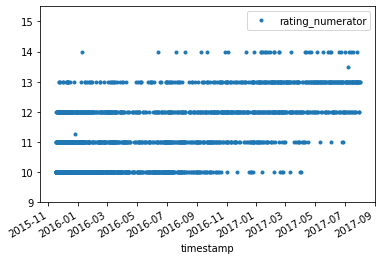

In [236]:
# ratings over time
df1.plot(x='timestamp',y='rating_numerator',style='.',ylim=[9,15.5])

tweet_id  followers_user                 timestamp  \
0     892420643555336193         8898085 2017-08-01 16:23:56+00:00   
1     892177421306343426         8898085 2017-08-01 00:17:27+00:00   
2     891815181378084864         8898085 2017-07-31 00:18:03+00:00   
3     891689557279858688         8898085 2017-07-30 15:58:51+00:00   
4     891327558926688256         8898085 2017-07-29 16:00:24+00:00   
5     891087950875897856         8898085 2017-07-29 00:08:17+00:00   
6     890971913173991426         8898085 2017-07-28 16:27:12+00:00   
7     890729181411237888         8898085 2017-07-28 00:22:40+00:00   
8     890609185150312448         8898085 2017-07-27 16:25:51+00:00   
10    890006608113172480         8898085 2017-07-26 00:31:25+00:00   
11    889880896479866881         8898085 2017-07-25 16:11:53+00:00   
13    889638837579907072         8898086 2017-07-25 00:10:02+00:00   
15    889278841981685760         8898086 2017-07-24 00:19:32+00:00   
16    888917238123831296         8898086 2017-07-23 00:22:39+00:00   
17    888804989199671297         8898087 2017-07-22 16:56:37+00:00   
18    888554962724278272         8898087 2017-07-22 00:23:06+00:00   
19    888078434458587136         8898087 2017-07-20 16:49:33+00:00   
20    887705289381826560         8898087 2017-07-19 16:06:48+00:00   
21    887517139158093824         8898087 2017-07-19 03:39:09+00:00   
22    887473957103951883         8898087 2017-07-19 00:47:34+00:00   
23    887343217045368832         8898087 2017-07-18 16:08:03+00:00   
24    887101392804085760         8898087 2017-07-18 00:07:08+00:00   
25    886983233522544640         8898087 2017-07-17 16:17:36+00:00   
26    886736880519319552         8898087 2017-07-16 23:58:41+00:00   
27    886680336477933568         8898087 2017-07-16 20:14:00+00:00   
29    886258384151887873         8898087 2017-07-15 16:17:19+00:00   
30    885984800019947520         8898087 2017-07-14 22:10:11+00:00   
31    885528943205470208         8898087 2017-07-13 15:58:47+00:00   
32    885518971528720385         8898087 2017-07-13 15:19:09+00:00   
33    885167619883638784         8898087 2017-07-12 16:03:00+00:00   
34    884925521741709313         8898088 2017-07-12 00:01:00+00:00   
35    884876753390489601         8898088 2017-07-11 20:47:12+00:00   
36    884562892145688576         8898088 2017-07-11 00:00:02+00:00   
37    884441805382717440         8898088 2017-07-10 15:58:53+00:00   
38    884247878851493888         8898088 2017-07-10 03:08:17+00:00   
40    883838122936631299         8898088 2017-07-09 00:00:04+00:00   
41    883482846933004288         8898088 2017-07-08 00:28:19+00:00   
43    883117836046086144         8898089 2017-07-07 00:17:54+00:00   
44    882992080364220416         8898089 2017-07-06 15:58:11+00:00   
46    882627270321602560         8898089 2017-07-05 15:48:34+00:00   
47    882268110199369728         8898089 2017-07-04 16:01:23+00:00   
48    882045870035918850         8898089 2017-07-04 01:18:17+00:00   
49    881906580714921986         8898089 2017-07-03 16:04:48+00:00   
50    881666595344535552         8898089 2017-07-03 00:11:11+00:00   
52    881268444196462592         8898089 2017-07-01 21:49:04+00:00   
53    880935762899988482         8898089 2017-06-30 23:47:07+00:00   
54    880872448815771648         8898089 2017-06-30 19:35:32+00:00   
55    880465832366813184         8898089 2017-06-29 16:39:47+00:00   
56    880221127280381952         8898089 2017-06-29 00:27:25+00:00   
57    880095782870896641         8898089 2017-06-28 16:09:20+00:00   
58    879862464715927552         8898089 2017-06-28 00:42:13+00:00   
59    879492040517615616         8898089 2017-06-27 00:10:17+00:00   
60    879415818425184262         8898708 2017-06-26 19:07:24+00:00   
61    879376492567855104         8898089 2017-06-26 16:31:08+00:00   
62    879050749262655488         8898089 2017-06-25 18:56:45+00:00   
63    879008229531029506         8898089 2017-06-25 16:07:47+00:00   
65    878604707211726852  

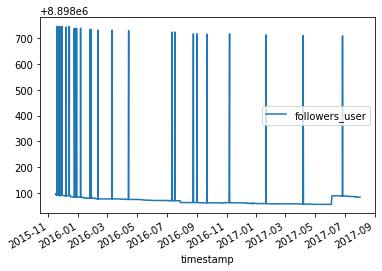

In [237]:
#df1.plot(x='timestamp',y='followers_user',style='.')
df1.plot(kind="line",x='timestamp',y='followers_user')
df1.followers_user.describe()
df1.query("followers_user>8500000")

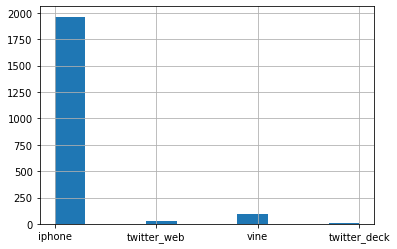

In [238]:
df1['source'].hist()

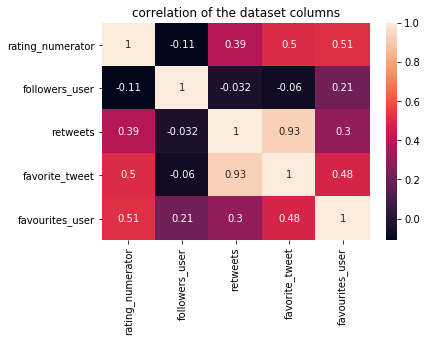

In [239]:
sns.heatmap(df1[['rating_numerator','source','followers_user','retweets','favorite_tweet','favourites_user']].corr(),annot=True)
plt.title('correlation of the dataset columns')

plt.savefig('correlation.png',bbox_inches="tight")

(<matplotlib.axes._subplots.AxesSubplot at 0x28782b08608>,)

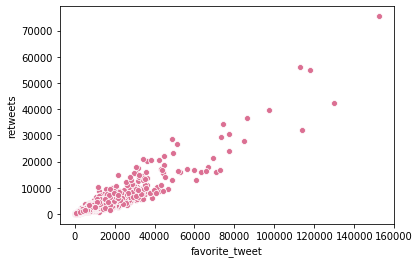

In [240]:
#watching correlating columns

sns.scatterplot(data=df1,x='favorite_tweet',y='retweets',color="palevioletred"),


In [241]:
# dog type share over teh dataset
qnty =df1.dog_type.value_counts()
qnty.head(15)

nan                         305
golden_retriever            156
labrador_retriever          106
pembroke                     94
chihuahua                    90
pug                          62
toy_poodle                   50
chow                         48
samoyed                      42
pomeranian                   41
malamute                     33
chesapeake_bay_retriever     31
french_bulldog               31
cocker_spaniel               30
miniature_pinscher           24
Name: dog_type, dtype: int64

In [242]:
# watching if dogtype [quantity effects ratings
x= df1.groupby('dog_type')[['dog_type','rating_numerator']]
x.head()

dog_type  rating_numerator
0                                nan              13.0
1                          chihuahua              13.0
2                          chihuahua              12.0
3                 labrador_retriever              13.0
4                             basset              12.0
5           chesapeake_bay_retriever              13.0
6                        appenzeller              13.0
7                         pomeranian              13.0
8                      irish_terrier              13.0
10                           samoyed              13.0
11                    french_bulldog              13.0
13                    french_bulldog              12.0
15                           whippet              13.0
16                  golden_retriever              12.0
17                  golden_retriever              13.0
18                    siberian_husky              13.0
19                    french_bulldog              12.0
20                            basset              13.0
21                               nan              14.0
22                          pembroke              13.0
23                  mexican_hairless              13.0
24                           samoyed              12.0
25                         chihuahua              13.0
26                            kuvasz              13.0
27                               nan              13.0
29                               pug              13.0
30                  blenheim_spaniel              12.0
31                               pug              13.0
32                               NaN              14.0
33                          malamute              13.0
34                 italian_greyhound              12.0
35                              chow              13.0
36                               pug              13.0
37                          pembroke              14.0
38                               NaN              13.0
40                          doberman              12.0
41                  golden_retriever              13.5
43                  golden_retriever              13.0
44                        eskimo_dog              13.0
46                          pembroke              13.0
47                  golden_retriever              13.0
49                        weimaraner              12.0
50                            saluki              13.0
52                               nan              12.0
53                               nan              13.0
54                          pembroke              12.0
56                         chihuahua              12.0
57                miniature_pinscher              11.0
58                            basset              13.0
59       german_short-haired_pointer              12.0
60                  english_springer              13.0
61                labrador_retriever              12.0
63                            vizsla              13.0
65                               NaN              13.0
66                            basset              13.0
67                    french_bulldog              14.0
68          chesapeake_bay_retriever              13.0
69                            basset              12.0
70                            saluki              13.0
71                          pembroke              12.0
73                               NaN              14.0
75              bernese_mountain_dog              13.0
76                labrador_retriever              13.0
77                    siberian_husky              13.0
78                               NaN              13.0
79       west_highland_white_terrier              12.0
80                labrador_retriever              12.0
82             flat-coated_retriever              12.0
84                      newfoundland              13.0
87                               pug              13.0
88                    cocker_spaniel              13.0
90                labrador_retriever              13.0
91           

In [243]:
dogtype_names = df1.dog_type.value_counts()
dogtype_names

nan                               305
golden_retriever                  156
labrador_retriever                106
pembroke                           94
chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
samoyed                            42
pomeranian                         41
malamute                           33
chesapeake_bay_retriever           31
french_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
eskimo_dog                         22
cardigan                           21
german_shepherd                    21
siberian_husky                     20
staffordshire_bullterrier          20
shih-tzu                           20
beagle                             20
maltese_dog                        19
shetland_sheepdog                  18
rottweiler                         18
kuvasz                             17
basset      

In [244]:
dogtype_names

nan                               305
golden_retriever                  156
labrador_retriever                106
pembroke                           94
chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
samoyed                            42
pomeranian                         41
malamute                           33
chesapeake_bay_retriever           31
french_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
eskimo_dog                         22
cardigan                           21
german_shepherd                    21
siberian_husky                     20
staffordshire_bullterrier          20
shih-tzu                           20
beagle                             20
maltese_dog                        19
shetland_sheepdog                  18
rottweiler                         18
kuvasz                             17
basset      

In [245]:
cnt = 0
dogtype_names.index[cnt]
ls = []
for i in dogtype_names:
    means = df1[df1['dog_type']==dogtype_names.index[cnt]]['rating_numerator'].mean()
    cnt = cnt+1
    ls.append(means)


In [246]:
dogs = pd.DataFrame(dogtype_names,columns=['dog_type','means'])
dogs['means'] = ls
dogs

dog_type      means
nan                                  305  10.773770
golden_retriever                     156  11.650641
labrador_retriever                   106  11.330189
pembroke                              94  11.659574
chihuahua                             90  11.077778
pug                                   62  10.741935
toy_poodle                            50  11.180000
chow                                  48  11.541667
samoyed                               42  11.761905
pomeranian                            41  11.121951
malamute                              33  11.000000
chesapeake_bay_retriever              31  11.032258
french_bulldog                        31  11.516129
cocker_spaniel                        30  11.400000
miniature_pinscher                    24  10.916667
eskimo_dog                            22  11.500000
cardigan                              21  11.380952
german_shepherd                       21  11.190476
siberian_husky                        20  11.350000
staffordshire_bullterrier             20  11.000000
shih-tzu                              20  10.700000
beagle                                20  10.600000
maltese_dog                           19  10.368421
shetland_sheepdog                     18  10.888889
rottweiler                            18  11.333333
kuvasz                                17  11.250588
basset                                17  11.235294
italian_greyhound                     17  10.764706
lakeland_terrier                      17  10.823529
west_highland_white_terrier           16  10.625000
american_staffordshire_terrier        16  11.062500
great_pyrenees                        15  11.533333
old_english_sheepdog                  14  11.142857
pekinese                              14  11.428571
soft-coated_wheaten_terrier           14  10.357143
schipperke                            13  11.153846
kelpie                                13  11.307692
vizsla                                13  11.076923
airedale                              12  10.750000
border_collie                         12  11.250000
boston_bull                           12  10.416667
dalmatian                             12  10.500000
great_dane                            11  11.000000
whippet                               11  10.818182
standard_poodle                       11  11.000000
malinois                              11  11.181818
collie                                11  11.000000
boxer                                 11  10.818182
norwegian_elkhound                    11  11.181818
bernese_mountain_dog                  11  11.272727
yorkshire_terrier                     10  10.800000
blenheim_spaniel                      10  11.200000
english_springer                      10  11.000000
borzoi                                10  10.800000
doberman                               9  11.333333
basenji                                9  10.555556
flat-coated_retriever                  8  11.500000
german_short-haired_pointer            8  10.500000
english_setter                         8  10.625000
miniature_poodle                       8  10.500000
brittany_spaniel                       8  10.875000
bloodhound                             7  11.285714
border_terrier                         7  12.142857
saint_bernard                          7  10.428571
newfoundland                           7  10.571429
mexican_hairless                       7  10.714286
papillon                               7  10.714286
dandie_dinmont                         7  10.857143
irish_terrier                          6  10.666667
norfolk_terrier                        6  11.333333
redbone                                6  10.666667
bedlington_terrier                     6  11.500000
bull_mastiff                           5  10.600000
miniature_schnauzer                    5  10.800000
lhasa                                  5  10.800000
norwich_terrier                        5  10.600000
walker_hound                

In [247]:
dogtype_names.head(1)


nan    305
Name: dog_type, dtype: int64

In [248]:
# watching the top 10 of ratings

dogs1 = dogs.head(10)
dogs1

dog_type      means
nan                      305  10.773770
golden_retriever         156  11.650641
labrador_retriever       106  11.330189
pembroke                  94  11.659574
chihuahua                 90  11.077778
pug                       62  10.741935
toy_poodle                50  11.180000
chow                      48  11.541667
samoyed                   42  11.761905
pomeranian                41  11.121951

In [249]:
dogs2 = dogs1.reset_index()
dogs2 = dogs2.sort_values(by="means",ascending=False)

dogs2.head(10)

index  dog_type      means
8             samoyed        42  11.761905
3            pembroke        94  11.659574
1    golden_retriever       156  11.650641
7                chow        48  11.541667
2  labrador_retriever       106  11.330189
6          toy_poodle        50  11.180000
9          pomeranian        41  11.121951
4           chihuahua        90  11.077778
0                 nan       305  10.773770
5                 pug        62  10.741935

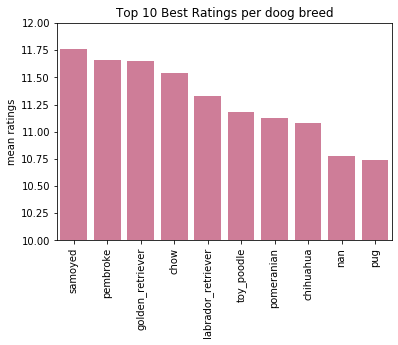

In [250]:
# numerator ratings with grouped dog breed type

sns.barplot(data=dogs2,x="index",y="means",color="palevioletred")
plt.ylim([10,12])
plt.xlabel('')
plt.ylabel('mean ratings')
plt.title('Top 10 Best Ratings per doog breed')

plt.xticks(rotation=90)
plt.grid(False)
plt.savefig('top10.png',bbox_inches="tight")

In [251]:
#get top1 samoyed information
df1.query("dog_type=='samoyed'").sort_values(by='retweets',ascending=False).head(1)

tweet_id  followers_user                 timestamp  source  \
2149  776218204058357768         8898063 2016-09-15 00:36:55+00:00  iphone   

                                                                                                                                  text  \
2149  Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744   

      retweets  favorite_tweet  favourites_user  rating_numerator  \
2149     15606           29570           145993              13.0   

      rating_denominator    name  \
2149                  10  noname   

                                                                 urls  \
2149  https://twitter.com/dog_rates/status/776218204058357768/photo/1   

        stage                                          jpg_url  img_num  \
2149  floofer  https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg      1.0   

     dog_type  
2149  samoyed

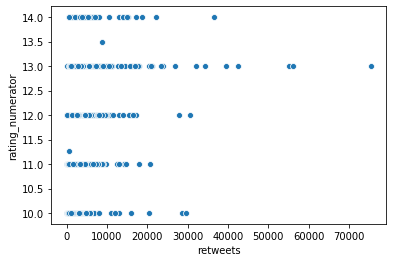

In [252]:
sns.scatterplot(data=df1,y='rating_numerator',x='retweets')


In [253]:
cnt1 = 0
dogtype_names.index[cnt1]
ls1 = []
for i in dogtype_names:
    retweets = df1[df1['dog_type']==dogtype_names.index[cnt1]]['retweets'].median()
    cnt1 = cnt1+1
    ls1.append(retweets)


In [254]:
ls1
dogsr = pd.DataFrame(dogtype_names)
dogsr['tweets'] = ls1
dogsr

dog_type  tweets
nan                                  305   910.0
golden_retriever                     156  1996.5
labrador_retriever                   106  1637.0
pembroke                              94  1700.0
chihuahua                             90   788.0
pug                                   62   840.5
toy_poodle                            50  1099.0
chow                                  48  1824.5
samoyed                               42  2066.0
pomeranian                            41  1087.0
malamute                              33  1741.0
chesapeake_bay_retriever              31  1412.0
french_bulldog                        31  2328.0
cocker_spaniel                        30  1774.5
miniature_pinscher                    24  1167.0
eskimo_dog                            22  1056.5
cardigan                              21  1970.0
german_shepherd                       21  1635.0
siberian_husky                        20  1039.5
staffordshire_bullterrier             20  1270.0
shih-tzu                              20   580.0
beagle                                20   736.0
maltese_dog                           19   789.0
shetland_sheepdog                     18  1164.0
rottweiler                            18   917.0
kuvasz                                17   941.0
basset                                17  2318.0
italian_greyhound                     17   886.0
lakeland_terrier                      17   924.0
west_highland_white_terrier           16   783.0
american_staffordshire_terrier        16  1748.0
great_pyrenees                        15  1686.0
old_english_sheepdog                  14  1248.0
pekinese                              14  1383.5
soft-coated_wheaten_terrier           14   762.5
schipperke                            13  1723.0
kelpie                                13  2085.0
vizsla                                13  1412.0
airedale                              12   834.5
border_collie                         12  1064.0
boston_bull                           12   760.0
dalmatian                             12  1168.0
great_dane                            11  1516.0
whippet                               11  1861.0
standard_poodle                       11  1065.0
malinois                              11  1132.0
collie                                11   928.0
boxer                                 11   720.0
norwegian_elkhound                    11  2200.0
bernese_mountain_dog                  11  1263.0
yorkshire_terrier                     10   956.5
blenheim_spaniel                      10   853.5
english_springer                      10   413.5
borzoi                                10   988.5
doberman                               9   935.0
basenji                                9   715.0
flat-coated_retriever                  8  2450.5
german_short-haired_pointer            8   651.5
english_setter                         8   750.0
miniature_poodle                       8   728.0
brittany_spaniel                       8   530.0
bloodhound                             7  1055.0
border_terrier                         7  1982.0
saint_bernard                          7   963.0
newfoundland                           7  1162.0
mexican_hairless                       7  1081.0
papillon                               7   675.0
dandie_dinmont                         7   712.0
irish_terrier                          6   564.5
norfolk_terrier                        6   918.5
redbone                                6   552.0
bedlington_terrier                     6  2532.5
bull_mastiff                           5  1064.0
miniature_schnauzer                    5   294.0
lhasa                                  5   915.0
norwich_terrier                        5   949.0
walker_hound                           5  1698.0
welsh_springer_spaniel                 4   468.5
tibetan_mastiff                        4  2481.5
tibetan_terrier                        4   457.5
rhodesian_ridgeback                    4   442.0
bluetick      

In [255]:
dogsr2 = dogsr.head(10)
dogsr2 = dogsr2.sort_values(by='tweets',ascending=False).reset_index()
dogsr2

index  dog_type  tweets
0             samoyed        42  2066.0
1    golden_retriever       156  1996.5
2                chow        48  1824.5
3            pembroke        94  1700.0
4  labrador_retriever       106  1637.0
5          toy_poodle        50  1099.0
6          pomeranian        41  1087.0
7                 nan       305   910.0
8                 pug        62   840.5
9           chihuahua        90   788.0

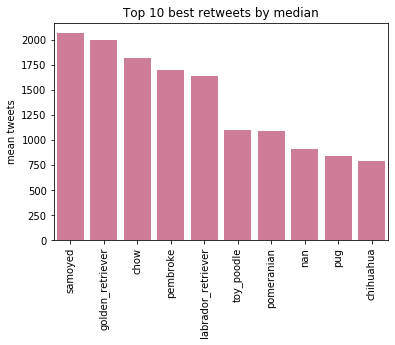

In [256]:
sns.barplot(data=dogsr2,x="index",y="tweets",color="palevioletred")

plt.xlabel('')
plt.ylabel('mean tweets')
plt.title('Top 10 best retweets by median')

plt.xticks(rotation=90)
plt.grid(False)
plt.savefig('top10_retweets.png',bbox_inches="tight")

### Final
The final act_report pdf can be watched in the provided files. The analysis has over 370 words.